In [4]:
import pandas as pd

# Load the data
df = pd.read_excel('Customer Purchase DataSet.xlsx')

# Inspect the first few rows of the dataframe
print(df.head())

# Inspect the data types and look for missing values
print(df.info())

                            Customer ID  Dollars Spent 2021  \
0  9c7cdc4c-18fd-47ba-a304-a69fd69e4326           45.636204   
1  9e30f633-4dc3-4200-831c-a5dacc53ed13           40.311935   
2  342178ad-b68d-410d-a840-2d73624f9ba2           29.037670   
3  8f4657d9-a63a-4dfa-b429-d31cb3633d79           97.266983   
4  c18da3ee-7005-49da-abf0-8070170f3dc8           44.905178   

   Dollars Spent 2022  
0           69.364189  
1           65.053696  
2           61.948933  
3          112.984993  
4           51.551075  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         20000 non-null  object 
 1   Dollars Spent 2021  20000 non-null  float64
 2   Dollars Spent 2022  20000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 468.9+ KB
None


       Dollars Spent 2021  Dollars Spent 2022  Change in Spending
count        20000.000000        20000.000000        20000.000000
mean            49.988890           64.828574           14.839685
std             30.112296           34.024137           10.345787
min             20.000851            4.977531          -24.711178
25%             28.627721           41.494162            7.764104
50%             40.724171           56.444206           14.841298
75%             61.652571           79.098406           21.824422
max            312.478394          350.753540           53.937508
Customer ID           0
Dollars Spent 2021    0
Dollars Spent 2022    0
Change in Spending    0
dtype: int64
Number of duplicate rows: 0


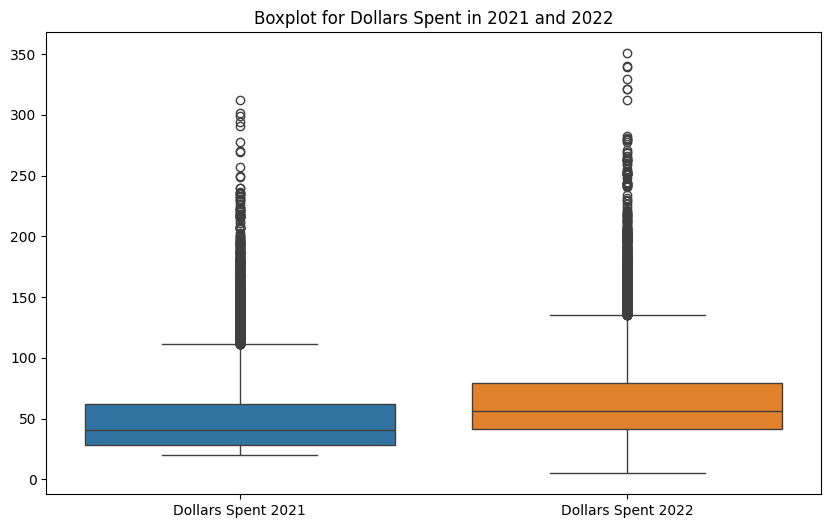

In [13]:
# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Dollars Spent 2021', 'Dollars Spent 2022']])
plt.title('Boxplot for Dollars Spent in 2021 and 2022')
plt.show()

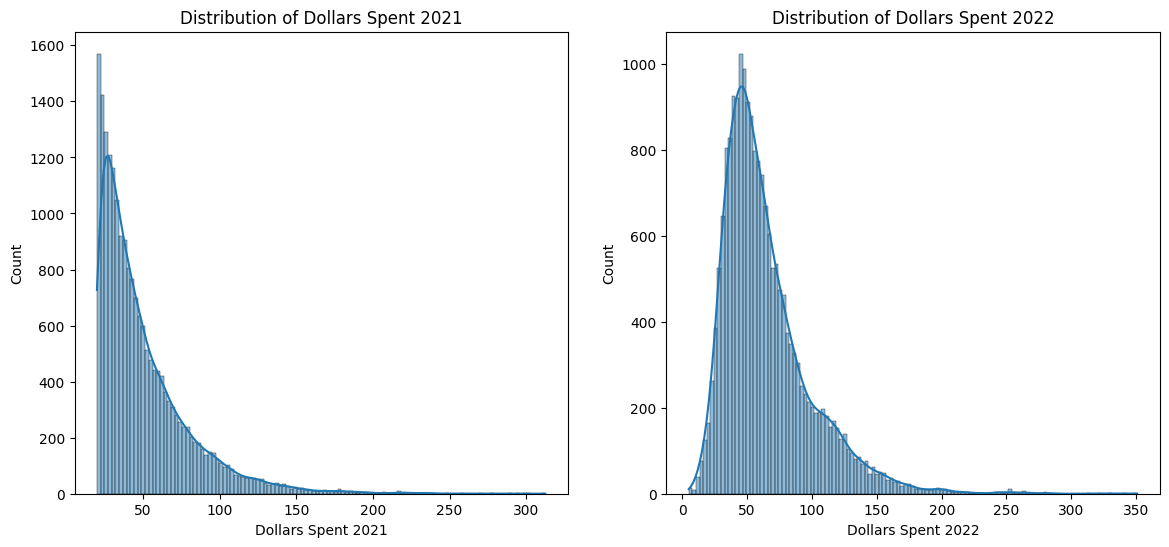

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Dollars Spent in 2021 and 2022
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Dollars Spent 2021'], kde=True)
plt.title('Distribution of Dollars Spent 2021')

plt.subplot(1, 2, 2)
sns.histplot(df['Dollars Spent 2022'], kde=True)
plt.title('Distribution of Dollars Spent 2022')

plt.show()

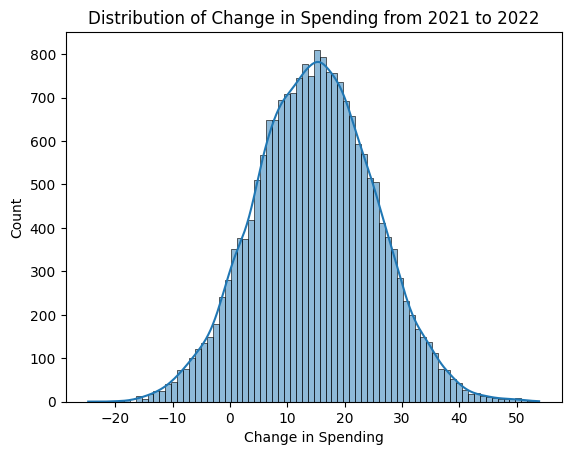

In [7]:
# Create a new column to show the difference in spending between 2021 and 2022
df['Change in Spending'] = df['Dollars Spent 2022'] - df['Dollars Spent 2021']

# Visualize the change in spending
sns.histplot(df['Change in Spending'], kde=True)
plt.title('Distribution of Change in Spending from 2021 to 2022')
plt.show()

Let's see how much do the "high spenders" actually spend relative to their previous year's total amount of money spent.

                                Customer ID  Dollars Spent 2021  \
0      9c7cdc4c-18fd-47ba-a304-a69fd69e4326           45.636204   
1      9e30f633-4dc3-4200-831c-a5dacc53ed13           40.311935   
2      342178ad-b68d-410d-a840-2d73624f9ba2           29.037670   
3      8f4657d9-a63a-4dfa-b429-d31cb3633d79           97.266983   
5      122fa6ad-f47d-4928-ac20-2d729ce1479f           53.655994   
...                                     ...                 ...   
19994  a92452d7-8901-4953-8231-11e77ec92bf4           43.674667   
19995  44d7123e-2198-43e6-802e-d9e62be2a623           47.566326   
19996  30b7870f-9d6b-4df9-ad1f-75c6649de5a8           38.233459   
19998  cef697bf-b640-44c4-9b6e-b0f214f7ab60           37.829941   
19999  e1a926a2-5155-4205-8cd2-e1b60eec4ab5           32.717262   

       Dollars Spent 2022  Change in Spending  
0               69.364189           23.727985  
1               65.053696           24.741760  
2               61.948933           32.911263  
3  

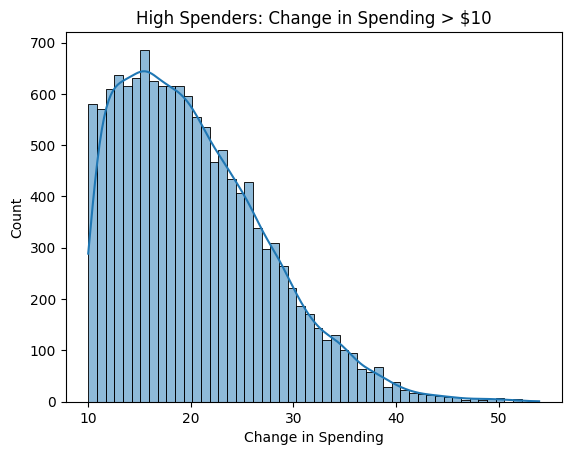

In [11]:
# Ex: look at customers with more than $10 increase in spending
high_spenders = df[df['Change in Spending'] > 10]
print(high_spenders)

# Visualize this group
sns.histplot(high_spenders['Change in Spending'], kde=True)
plt.title('High Spenders: Change in Spending > $10')
plt.show()

Analyze trends using a rolling window to smooth spending data and identify trends:

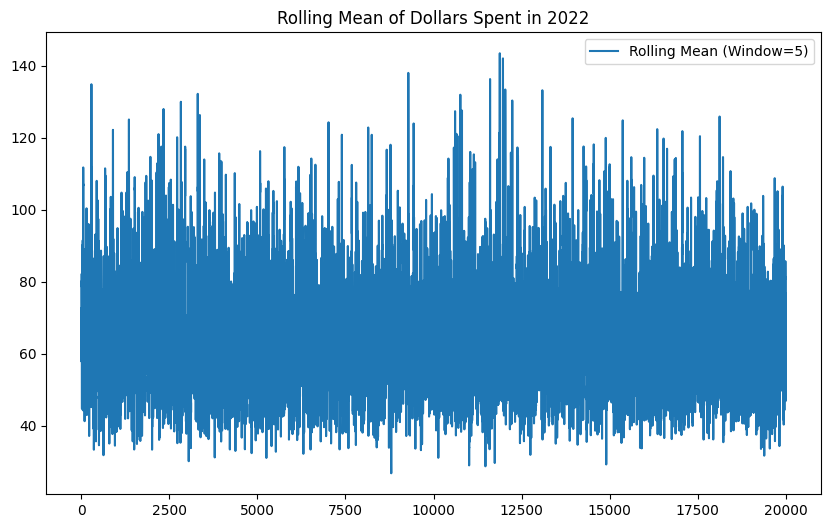

In [20]:
df['Rolling Mean'] = df['Dollars Spent 2022'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Rolling Mean'], label='Rolling Mean (Window=5)')
plt.title('Rolling Mean of Dollars Spent in 2022')
plt.legend()
plt.show()

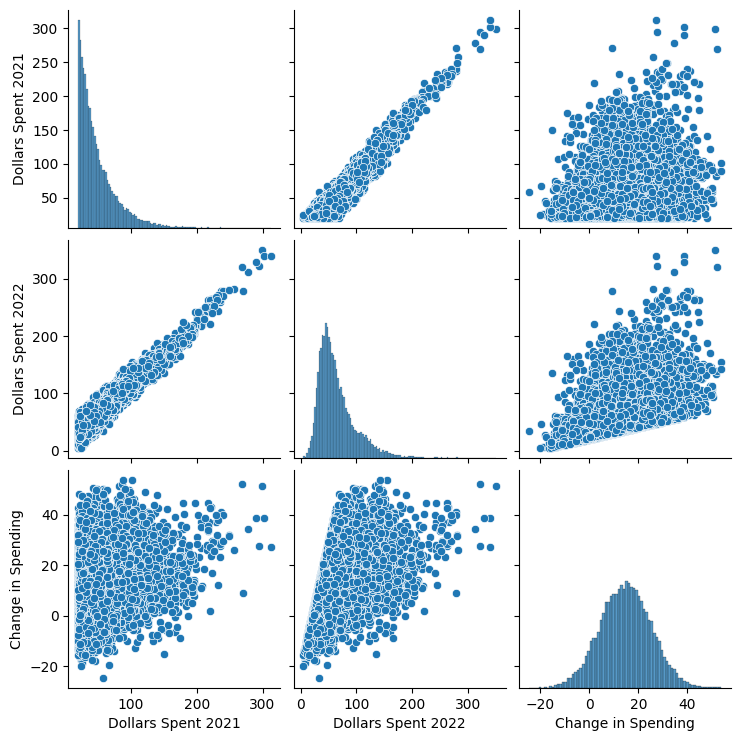

In [14]:
sns.pairplot(df[['Dollars Spent 2021', 'Dollars Spent 2022', 'Change in Spending']])
plt.show()

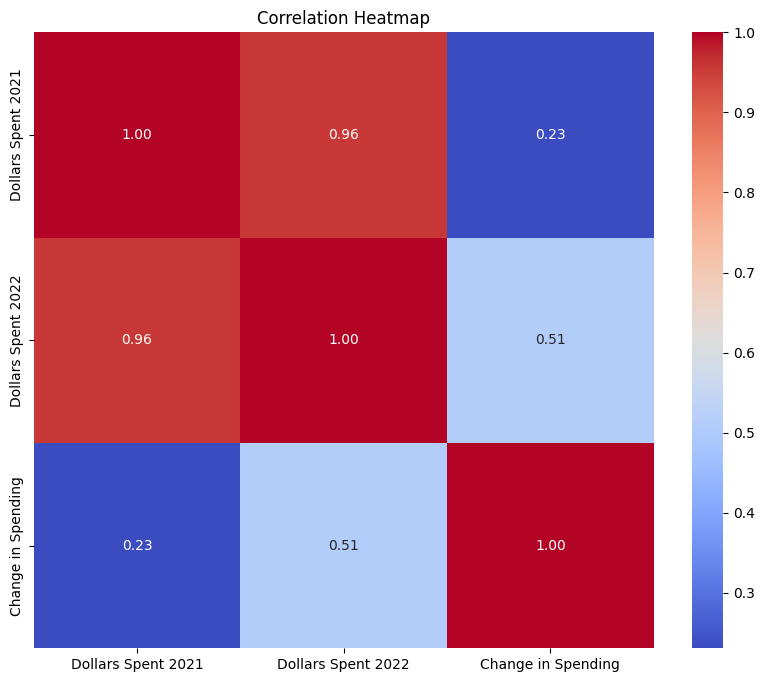

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['Customer ID']).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Performing a clustering approaching to see how the data is categorized.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


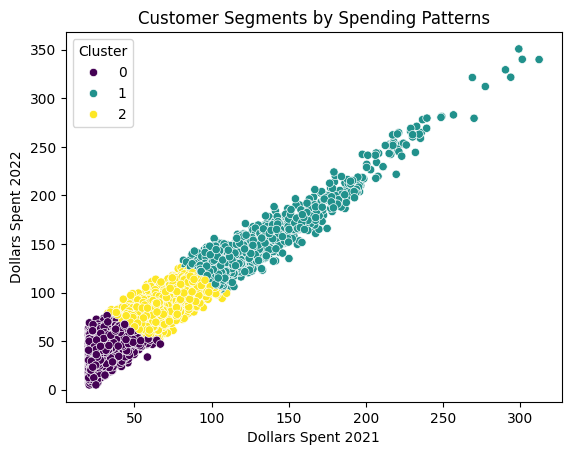

In [18]:
from sklearn.cluster import KMeans

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Dollars Spent 2021', 'Dollars Spent 2022']])

# Visualize clusters
sns.scatterplot(x='Dollars Spent 2021', y='Dollars Spent 2022', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments by Spending Patterns')
plt.show()


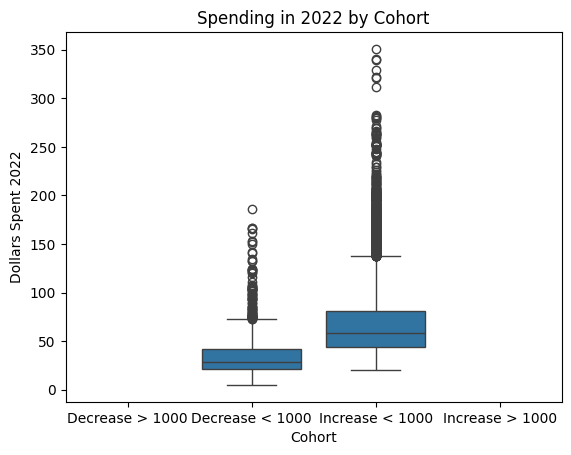

In [19]:
df['Cohort'] = pd.cut(df['Change in Spending'], bins=[-float('inf'), -1000, 0, 1000, float('inf')],
                      labels=['Decrease > 1000', 'Decrease < 1000', 'Increase < 1000', 'Increase > 1000'])

sns.boxplot(x='Cohort', y='Dollars Spent 2022', data=df)
plt.title('Spending in 2022 by Cohort')
plt.show()

Threshold Analysis for Changes in Spending

In [21]:
threshold_values = [0, 100, 500, 1000]
for threshold in threshold_values:
    high_spenders = df[df['Change in Spending'] > threshold]
    print(f"Threshold: {threshold}, Number of High Spenders: {high_spenders.shape[0]}")

Threshold: 0, Number of High Spenders: 18508
Threshold: 100, Number of High Spenders: 0
Threshold: 500, Number of High Spenders: 0
Threshold: 1000, Number of High Spenders: 0


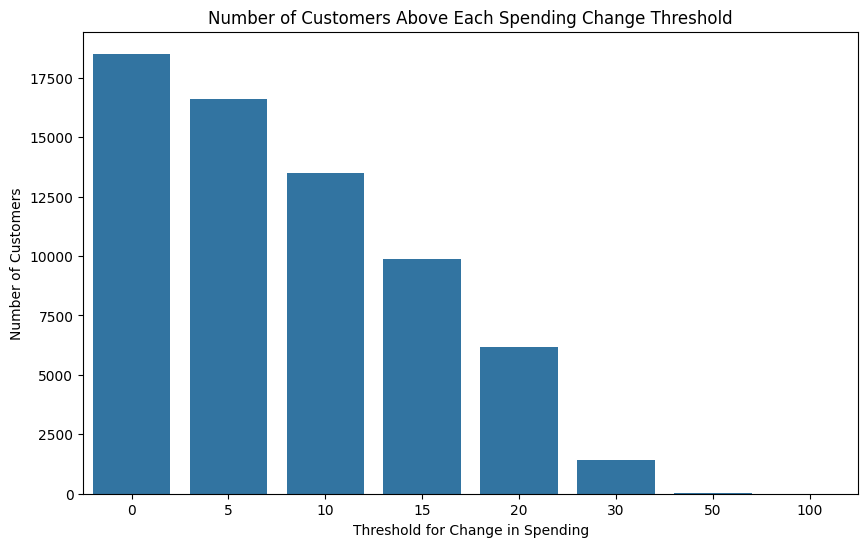

In [23]:
thresholds = [0, 5, 10, 15, 20, 30, 50, 100]
counts = [df[df['Change in Spending'] > t].shape[0] for t in thresholds]

plt.figure(figsize=(10, 6))
sns.barplot(x=thresholds, y=counts)
plt.title('Number of Customers Above Each Spending Change Threshold')
plt.xlabel('Threshold for Change in Spending')
plt.ylabel('Number of Customers')
plt.show()